In [1]:

# importing libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call

# Load MNIST dataset
from keras.datasets import mnist

In [2]:
### Split the training data into traing, validation and test set 

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=0)

# Training set: The purpose is used to train the model to make the desired accurate predictions
# Development set: The purpose is to assess if the model is generalising well to data not in the training set
# Test set: The purpose is to assess the performance and accuracy of the model on unseen data 

In [16]:
x_train = np.reshape(x_train, (45000, 784))
x_val = np.reshape(x_val, (15000, 28*28))
x_test = np.reshape(x_test, (10000, 28*28))

In [17]:
print(x_val.shape)
print(y_train.shape)

(15000, 784)
(45000,)


In [18]:
### Use the random forest classifier to create a classification model 

rfc = RandomForestClassifier()
model = rfc.fit(x_train, y_train)

In [21]:
# I will pick the max_depth parameter to tune because with the 
# development data that I also have generated from the dataset,
# I can assess the models performance against data not seen in the training
# set and therefore try and spot any under or overfitting. 
# I can then prune the tree to the optimum depth. 

In [27]:
# Function that prints value of max_depth that leads to the highest accuracy 
def random_forest_tuning(x_training, y_training, x_dev, y_dev):
    
    score_list = []
    max_depth_list = []
    
    # For values of n from 1 - 100, create a random forest model with
    # variable 'max_depth' values and calculate the accuracy 
    for n in range(1, 101):
        
        random_forest = RandomForestClassifier(max_depth=n)
        random_forest.fit(x_training, y_training)
        
        score = random_forest.score(x_dev, y_dev)
        
        score_list.append(score)
        max_depth_list.append(n)

        
    # Find the most accurate model and it's 'n_estimators'/'max_depth' value
    best_score = max(score_list)
    best_score_index = score_list.index(best_score)
    
    best_max = max_depth_list[best_score_index]
    
    print("Best accuracy is: ", best_score)
    print("Best max_depth is: ", best_max)

In [28]:
random_forest_tuning(x_train, y_train, x_val, y_val)

Best accuracy is:  0.9696666666666667
Best max_depth is:  85


In [29]:
# Value for max_depth chosen is: 85
# This value leads to the model which performs the most accurately 
# on the development data
# The model accuracy when the max_depth is 85 = 0.97 

In [31]:
# Create final model with optimum max depth

final_model = RandomForestClassifier(max_depth=85)
final_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=85)

In [32]:
# Make predictions on test data
preds = final_model.predict(x_test)

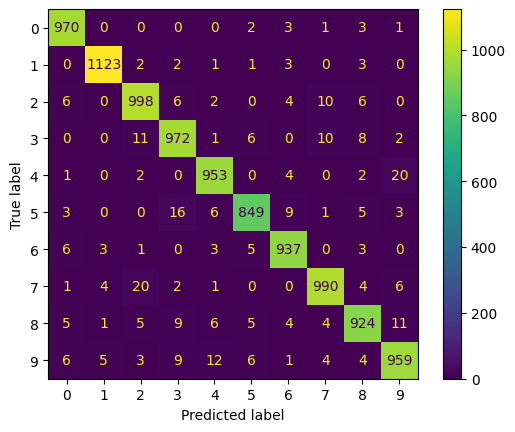

In [42]:
### Print confusion matrix for the random forest model on the test set

# Import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_test, preds)
display = ConfusionMatrixDisplay(conf_mat)
display.plot()

In [43]:
### Report which classes the model struggles with most 
# On my visual assessment model seemed to struggle the most with:
# 4's - mistaking them for 9's 
# 5's - mistaking them for 3's 
# 7's - mistaking them for 2's

In [44]:
### Report accuracy, precision, recall and f1 score 

# Calculate the class by class precision, recall and f1-score
from sklearn.metrics import classification_report
 
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.95      0.96       892
           6       0.97      0.98      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.95       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [45]:
# Looking at the f1 score for each class it seems apparent that
# contrary to my visual assessment, the model seemed to struggle
# the most with 8's and 9's 

In [46]:
# The overall accuracy, precision, recall and f1 score were:

In [63]:
score = final_model.score(x_test, y_test)
precision = precision_score(y_test, preds, average='micro')
recall = recall_score(y_test, preds, average='micro')
f1_score = f1_score(y_test, preds, average='micro')

In [64]:
print(f"Overall accuracy is {round(score * 100, 2)}%")
print(f"Overall precision is {round(precision * 100, 2)}%")
print(f"Overall recall is {round(recall * 100, 2)}%")
print(f"Overall f1 score is {round(f1_score * 100, 2)}%")

Overall accuracy is 96.75%
Overall precision is 96.75%
Overall recall is 96.75%
Overall f1 score is 96.75%
